In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Basic info check

In [ ]:
print('shape of dataset:', df.shape)

# Check for datatypes
df.info()


shape of dataset: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
#statistics of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Count of missing values in each column
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

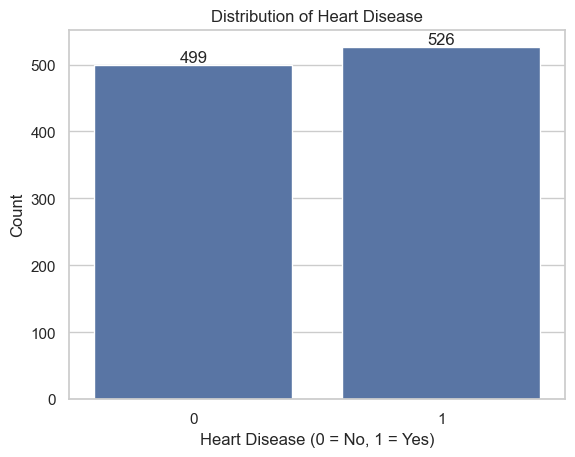

In [15]:
#Value counts of the target variable 'target' (0 = No heart disease, 1 = Yes)
df['target'].value_counts()

# Visualize the distribution of the target variable
ax = sns.countplot(x='target', data=df)
plt.bar_label(ax.containers[0])

plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')   
plt.ylabel('Count')
plt.show()

Split features into two categories:

Numerical Features → histplot, boxplot, distribution

Categorical Features → countplot, barplot

To identify which columns comes under which category:- do below

df.nunique()  ->   this gives unique values for each columns & if values are under 5 - 10 then -> Categorical
& if values are beyond or diversified then -> Numerical



In [16]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

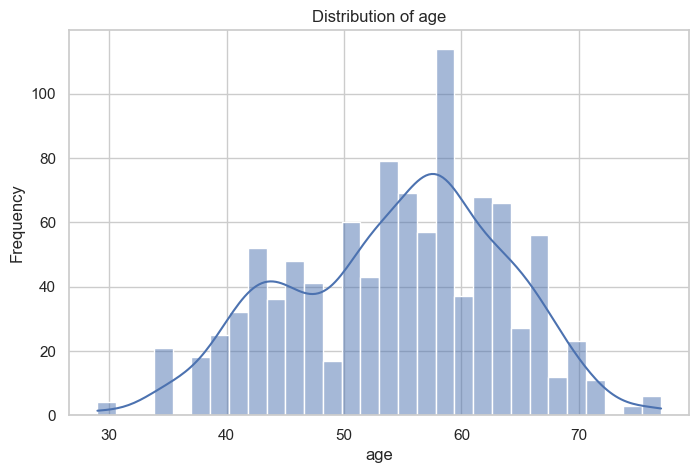

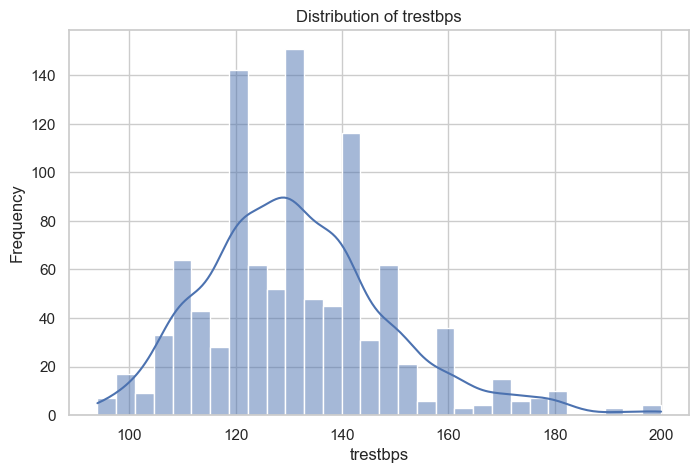

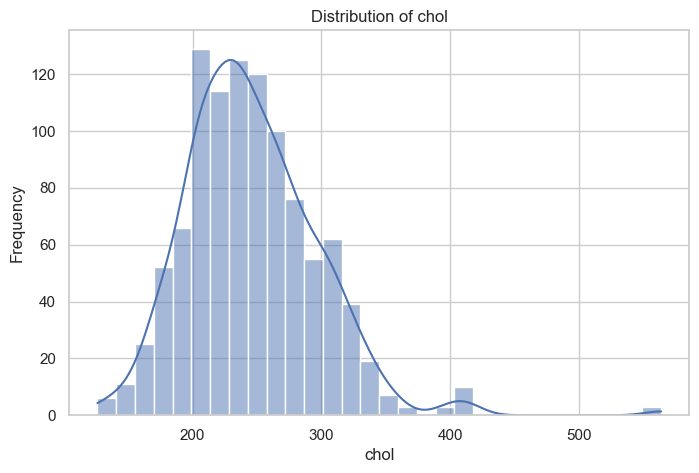

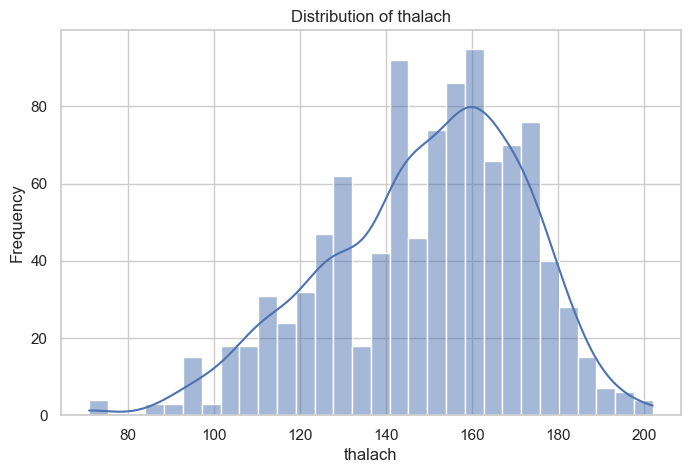

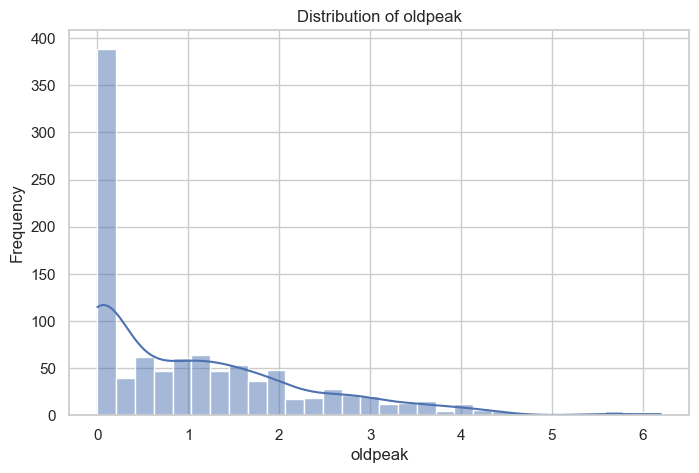

In [18]:
# for Numerical columns, we can visualize the distribution
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

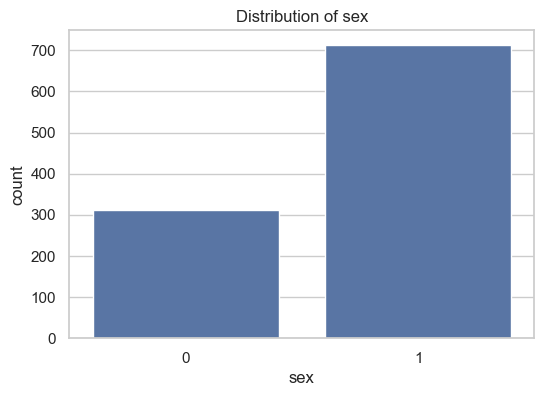

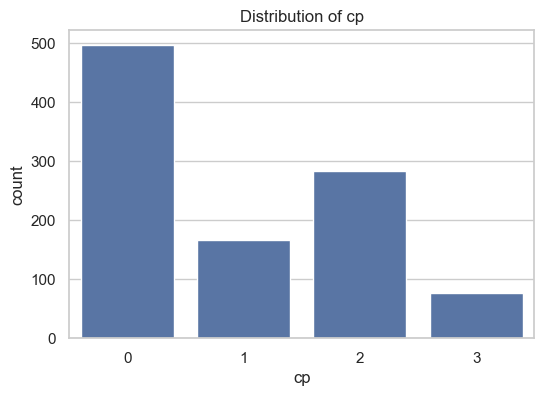

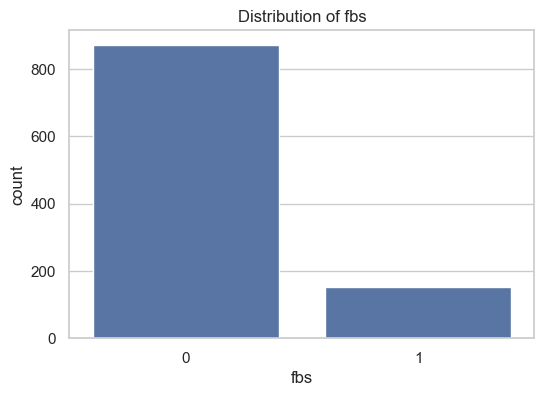

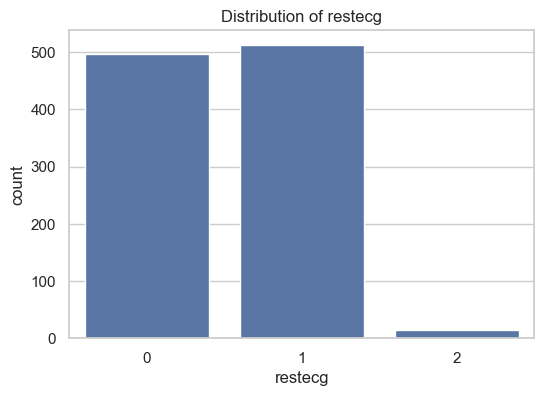

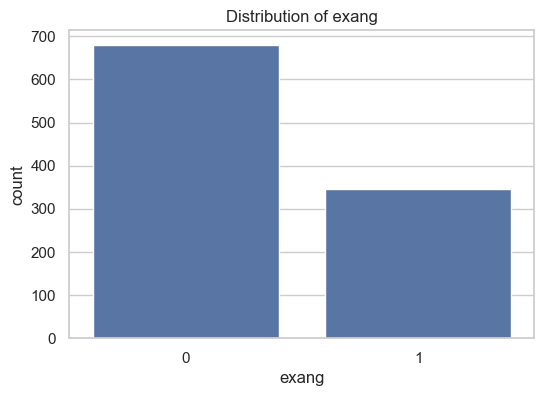

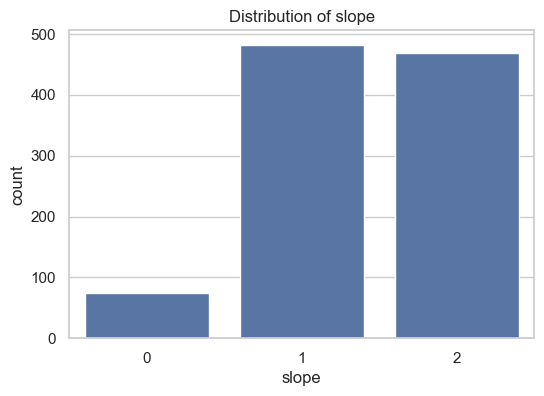

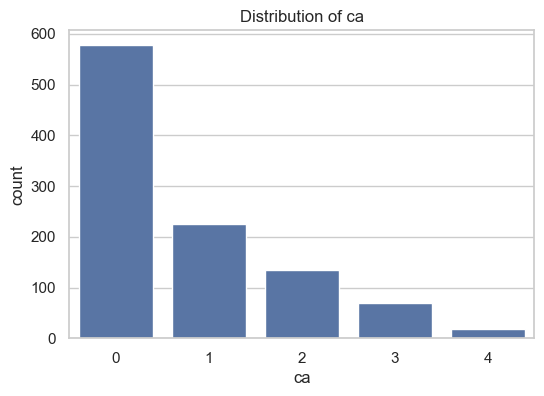

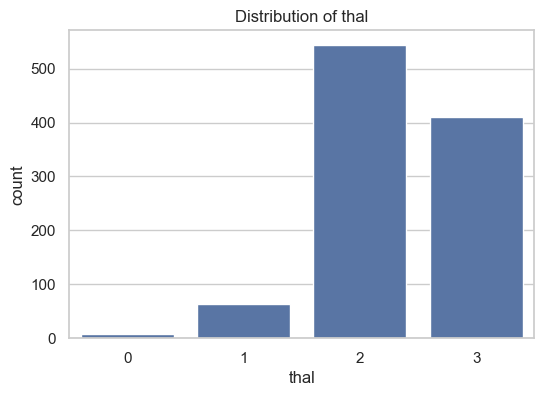

In [19]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()


Univariate analysis

| Feature | Insight                         |
| ------- | ------------------------------- |
| Age     | Most patients 40–65             |
| Sex     | More males                      |
| CP      | Certain chest pain types common |
| FBS     | Mostly normal sugar             |
| Chol    | Some high outliers              |
| RestECG | Mostly normal                   |
| Oldpeak | Centered around 1–2             |
| ca      | Mostly 0 or 1 vessels           |


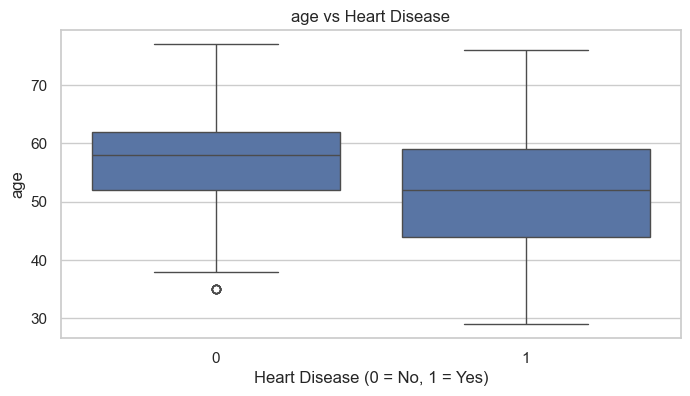

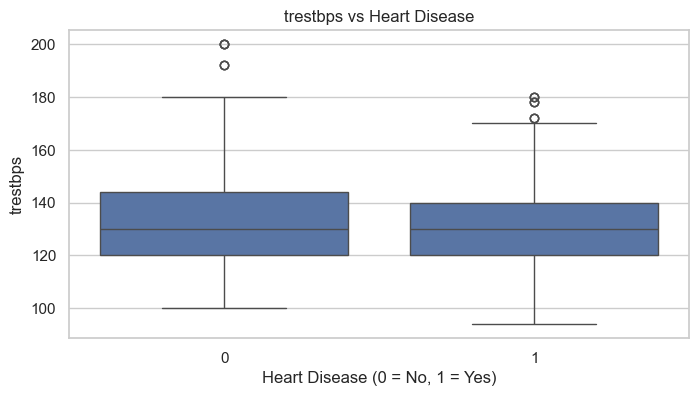

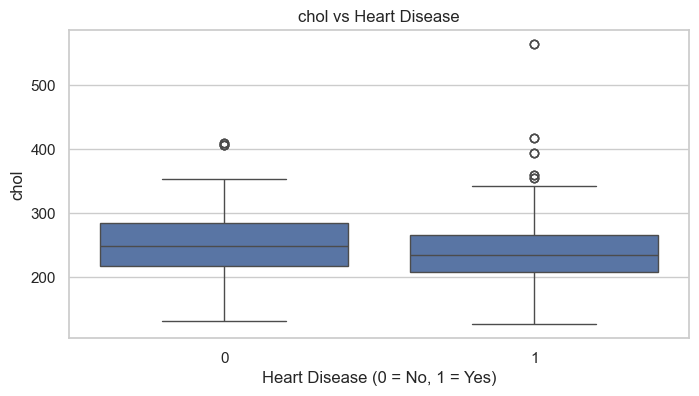

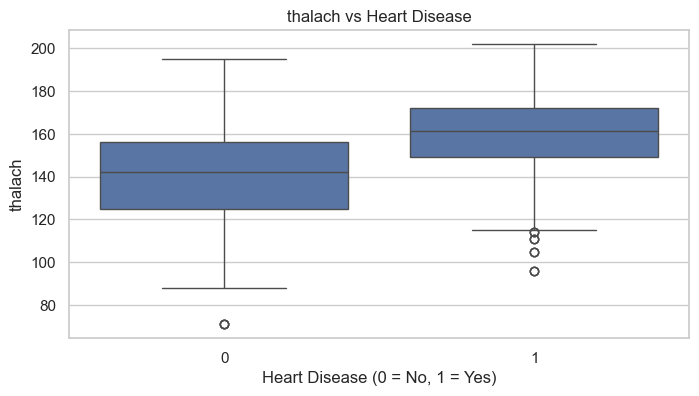

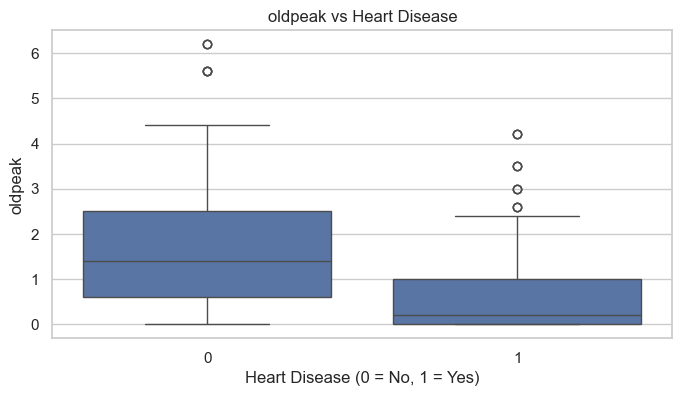

In [3]:
# Visualize the relationship between numerical features and the target variable

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} vs Heart Disease')
    plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
    plt.ylabel(col)
    plt.show()


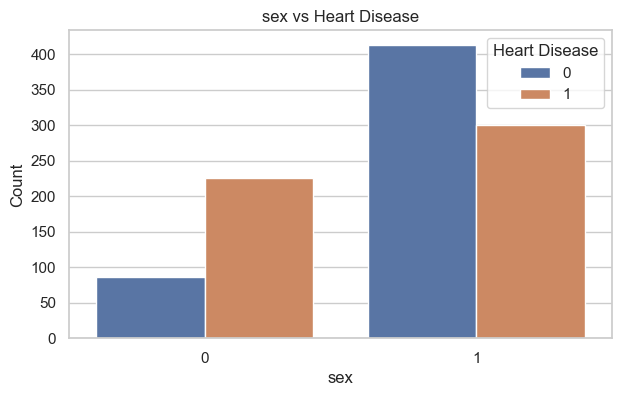

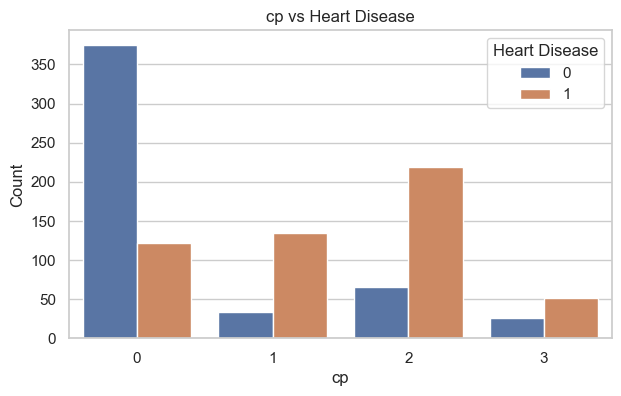

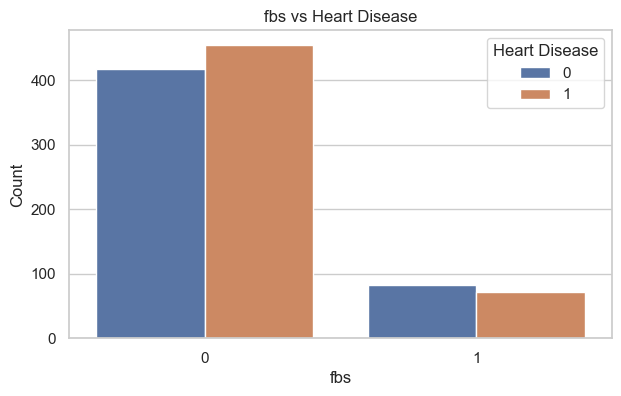

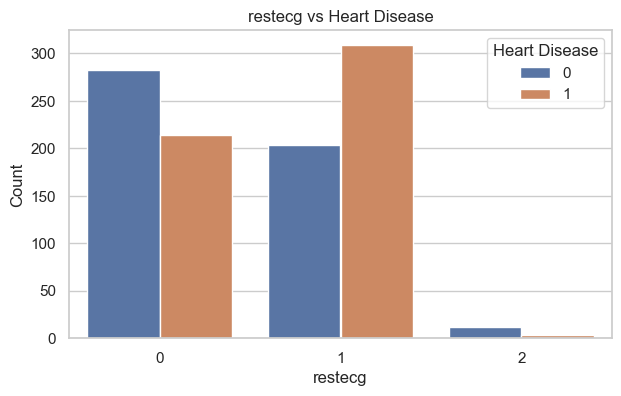

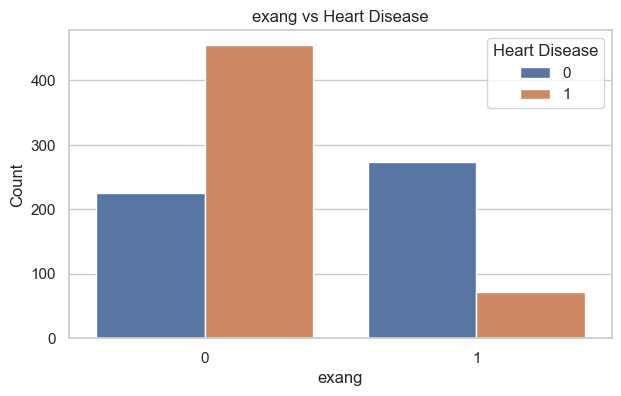

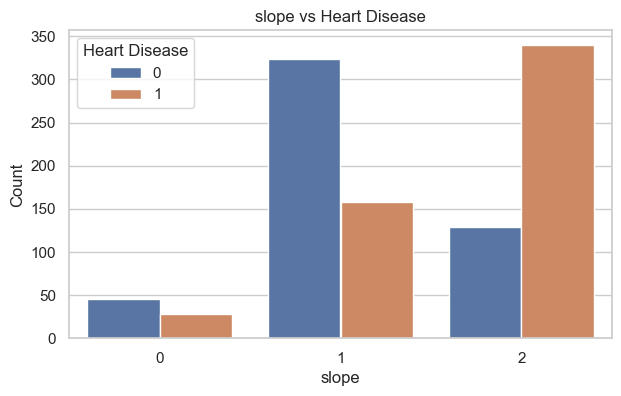

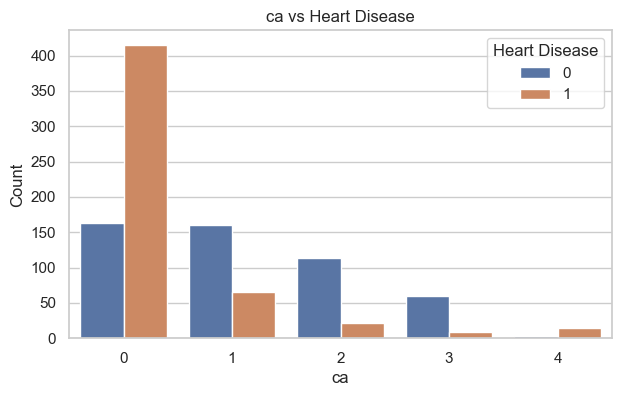

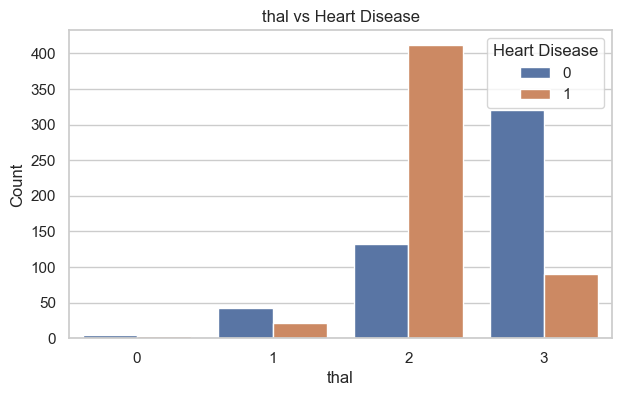

In [4]:
# Visualize the relationship between categorical features and the target variable

categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in categorical_features:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'{col} vs Heart Disease')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Heart Disease')
    plt.show()


"Heart disease is strongly influenced by ECG-related factors, chest pain types, vessel blockage, and thalassemia type."

In [5]:
df.to_csv("heart_disease_clean.csv", index=False)
